In [1]:
1+4

5

## 2

Simulating second-price auctions...

Results for second-price auctions:
Mean of highest bid: 1.5518
Mean of second highest bid: 1.0089

Simulating modified ascending auctions...

Number of bidders that participated in each auction:
Mean: 4.89
Min: 2
Max: 9
SD: 1.3113426781812676
Median: 5.0

Frequency distribution:
num_bidders_participated
2     20
3    118
4    266
5    295
6    178
7     96
8     26
9      1
Name: count, dtype: int64

Mean of submitted bids across auctions:
Mean of means: 0.5609
Variance of means: 0.2179

T-test for mean of submitted bids = 0:
t-statistic: 37.9932
p-value: 0.00000000
Can we reject null hypothesis that mean = 0? Yes

Comparison with second-price auction:
Highest bid - Modified ascending vs Second-price: 1.5558 vs 1.5518
Second highest bid - Modified ascending vs Second-price: 1.0166 vs 1.0089

Comparison of auction formats:


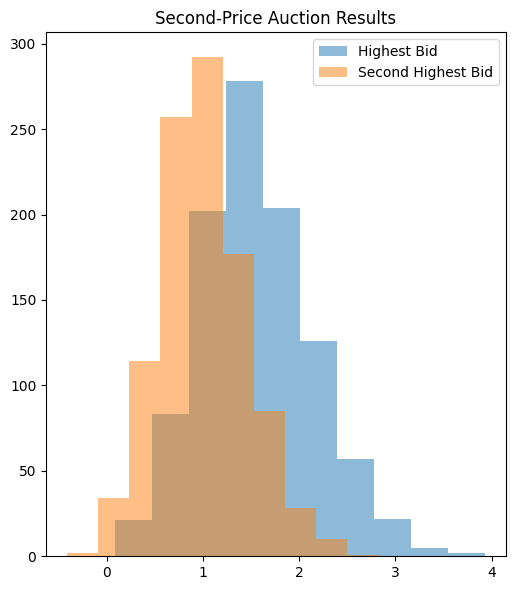

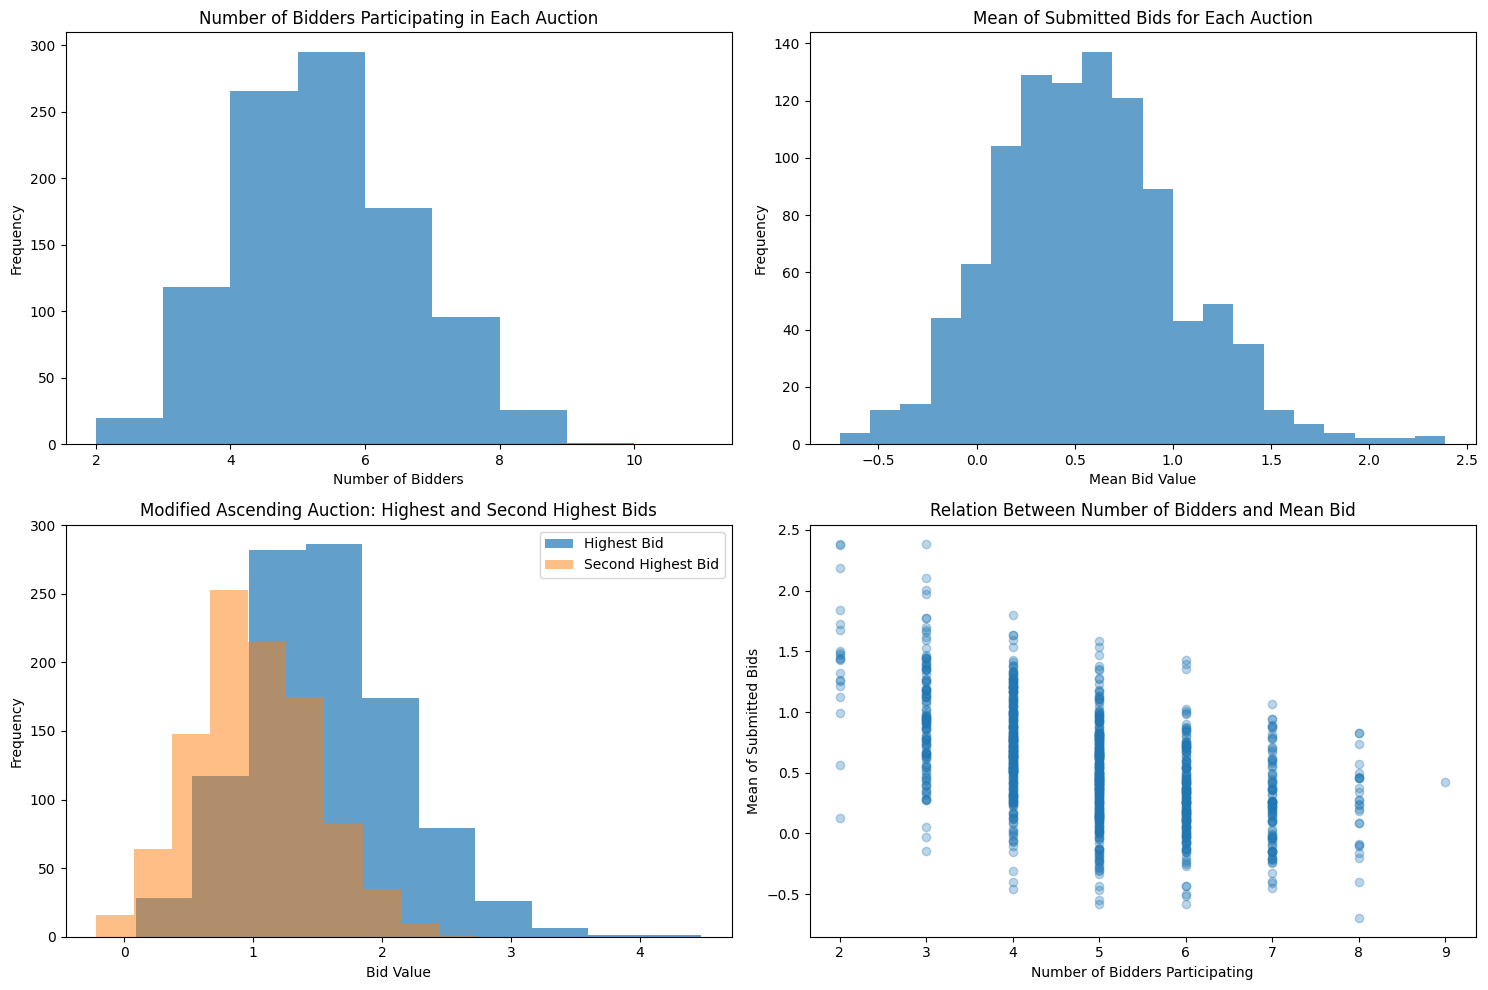

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)
def simulate_modified_ascending_auctions(num_auctions, num_bidders):
    """
    Simulate modified ascending auctions with i.i.d. N(0,1) valuations.
    
    Auction mechanism:
    1. First two bidders always bid their true value
    2. min_bid is set to min of first two private values
    3. Subsequent bidders only bid if their value is higher than min_bid
    4. When a new bidder bids, min_bid is recalculated as min of two highest bids
    
    Parameters:
    -----------
    num_auctions : int
        Number of auctions to simulate
    num_bidders : int
        Number of bidders per auction
    
    Returns:
    --------
    DataFrame containing auction results
    """
    # Initialize results dataframe
    columns = ['highest_bid', 'second_highest_bid', 'num_bidders_participated', 
              'mean_of_submitted_bids', 'submitted_bids']
    results = pd.DataFrame(index=range(num_auctions), columns=columns)
    
    for i in range(num_auctions):
        # Generate N(0,1) valuations for each bidder
        valuations = np.random.normal(0, 1, num_bidders)
        
        # Track bids that have been submitted
        submitted_bids = []
        submitted_bidders = []
        
        # First two bidders always bid
        submitted_bids.append(valuations[0])
        submitted_bidders.append(0)
        submitted_bids.append(valuations[1])
        submitted_bidders.append(1)
        
        # Sort the current bids (highest first)
        current_bids = sorted(submitted_bids, reverse=True)
        
        # Set min_bid as min of first two bids
        min_bid = min(valuations[0], valuations[1])
        
        # Bidders 3 to n arrive in order
        for j in range(2, num_bidders):
            # Current bidder's valuation
            valuation = valuations[j]
            
            # If valuation is higher than min_bid, bidder participates
            if valuation > min_bid:
                submitted_bids.append(valuation)
                submitted_bidders.append(j)
                
                # Update current_bids and min_bid
                current_bids = sorted(submitted_bids, reverse=True)
                if len(current_bids) >= 2:
                    min_bid = current_bids[1]  # Second highest bid
        
        # Record results
        submitted_bids_array = np.array(submitted_bids)
        results.loc[i, 'highest_bid'] = current_bids[0] if len(current_bids) > 0 else np.nan
        results.loc[i, 'second_highest_bid'] = current_bids[1] if len(current_bids) > 1 else np.nan
        results.loc[i, 'num_bidders_participated'] = len(submitted_bids)
        results.loc[i, 'mean_of_submitted_bids'] = np.mean(submitted_bids_array) if len(submitted_bids) > 0 else np.nan
        results.loc[i, 'submitted_bids'] = submitted_bids_array.tolist()
    
    return results

def simulate_second_price_auctions(num_auctions, num_bidders):
    """
    Simulate second-price auctions with i.i.d. N(0,1) valuations.
    
    Parameters:
    -----------
    num_auctions : int
        Number of auctions to simulate
    num_bidders : int
        Number of bidders per auction
    
    Returns:
    --------
    DataFrame containing auction results
    """
    # Initialize results dataframe
    results = pd.DataFrame(index=range(num_auctions), 
                          columns=['highest_bid', 'second_highest_bid'])
    
    for i in range(num_auctions):
        # Generate N(0,1) valuations for each bidder
        valuations = np.random.normal(0, 1, num_bidders)
        
        # In a second-price auction, the dominant strategy is to bid your true valuation
        bids = valuations
        
        # Sort bids in descending order
        sorted_bids = np.sort(bids)[::-1]
        
        # Record highest and second highest bids
        results.loc[i, 'highest_bid'] = sorted_bids[0]
        results.loc[i, 'second_highest_bid'] = sorted_bids[1]
    
    return results

def simulate_ascending_auctions(num_auctions, num_bidders):
    """
    Simulate ascending (English) auctions with i.i.d. N(0,1) valuations.
    Bidders arrive in order of their numbers.
    
    Parameters:
    -----------
    num_auctions : int
        Number of auctions to simulate
    num_bidders : int
        Number of bidders per auction
    
    Returns:
    --------
    DataFrame containing auction results
    """
    # Initialize results dataframe
    results = pd.DataFrame(index=range(num_auctions), 
                          columns=['highest_bid', 'second_highest_bid'])
    
    for i in range(num_auctions):
        # Generate N(0,1) valuations for each bidder
        valuations = np.random.normal(0, 1, num_bidders)
        
        # Track the current minimum bid (starts at negative infinity)
        current_min_bid = float('-inf')
        
        # Track the highest bidder and bid
        highest_bidder = -1
        highest_bid = float('-inf')
        second_highest_bid = float('-inf')
        
        # Bidders arrive in order
        for j in range(num_bidders):
            # Current bidder's valuation
            valuation = valuations[j]
            
            # If bidder's valuation is higher than the current minimum bid
            if valuation > current_min_bid:
                # Update second highest bid if there was already a highest bid
                if highest_bid > float('-inf'):
                    second_highest_bid = current_min_bid
                
                # This bidder becomes the highest bidder
                current_min_bid = valuation
                highest_bidder = j
                highest_bid = valuation
        
        # Record highest and second highest bids
        results.loc[i, 'highest_bid'] = highest_bid
        results.loc[i, 'second_highest_bid'] = second_highest_bid
    
    return results

def run_simulation():
    # Simulation parameters
    num_auctions = 1000
    num_bidders = 10
    
    print("Simulating second-price auctions...")
    second_price_results = simulate_second_price_auctions(num_auctions, num_bidders)
    
    print("\nResults for second-price auctions:")
    print(f"Mean of highest bid: {second_price_results['highest_bid'].mean():.4f}")
    print(f"Mean of second highest bid: {second_price_results['second_highest_bid'].mean():.4f}")
 
    # Visualize results
    plt.figure(figsize=(10, 6))
    
    plt.subplot(1, 2, 1)
    plt.hist(second_price_results['highest_bid'], alpha=0.5, label='Highest Bid')
    plt.hist(second_price_results['second_highest_bid'], alpha=0.5, label='Second Highest Bid')
    plt.title('Second-Price Auction Results')
    plt.legend()
    
    
    
    plt.tight_layout()
    plt.savefig('auction_results.png')
    print("\nSimulating modified ascending auctions...")
    ascending_results = simulate_modified_ascending_auctions(num_auctions, num_bidders)
    
    # Summary statistics of number of bidders that bid in each auction
    bidder_counts = ascending_results['num_bidders_participated']
    print("\nNumber of bidders that participated in each auction:")
    print(f"Mean: {bidder_counts.mean():.2f}")
    print(f"Min: {bidder_counts.min()}")
    print(f"Max: {bidder_counts.max()}")
    print(f"SD: {bidder_counts.std()}")
    print(f"Median: {bidder_counts.median()}")
    print("\nFrequency distribution:")
    print(bidder_counts.value_counts().sort_index())
    
    # Compute mean of submitted bids for each auction
    mean_bids = ascending_results['mean_of_submitted_bids']
    print("\nMean of submitted bids across auctions:")
    print(f"Mean of means: {mean_bids.mean():.4f}")
    print(f"Variance of means: {np.var(mean_bids, ddof=1):.4f}")
    # Convert the mean_submitted_bids to a numerical array, filtering out NaN values
    mean_bids_numeric = np.array([x for x in mean_bids if not np.isnan(x)], dtype=float)

    # Perform t-test on the cleaned data
    t_stat, p_value = stats.ttest_1samp(mean_bids_numeric, 0)
    print("\nT-test for mean of submitted bids = 0:")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_value:.8f}")
    print(f"Can we reject null hypothesis that mean = 0? {'Yes' if p_value < 0.05 else 'No'}")
    # T-test to check if mean of submitted bids is zero
   
    # Plot histograms
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    plt.hist(bidder_counts, bins=range(2, num_bidders+2), alpha=0.7)
    plt.title('Number of Bidders Participating in Each Auction')
    plt.xlabel('Number of Bidders')
    plt.ylabel('Frequency')
    
    plt.subplot(2, 2, 2)
    plt.hist(mean_bids, bins=20, alpha=0.7)
    plt.title('Mean of Submitted Bids for Each Auction')
    plt.xlabel('Mean Bid Value')
    plt.ylabel('Frequency')
    
    plt.subplot(2, 2, 3)
    plt.hist(ascending_results['highest_bid'], alpha=0.7, label='Highest Bid')
    plt.hist(ascending_results['second_highest_bid'], alpha=0.5, label='Second Highest Bid')
    plt.title('Modified Ascending Auction: Highest and Second Highest Bids')
    plt.xlabel('Bid Value')
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.subplot(2, 2, 4)
    plt.scatter(bidder_counts, mean_bids, alpha=0.3)
    plt.title('Relation Between Number of Bidders and Mean Bid')
    plt.xlabel('Number of Bidders Participating')
    plt.ylabel('Mean of Submitted Bids')
    
    plt.tight_layout()
    plt.savefig('modified_ascending_auction_results.png')
    
    # Compare with second-price auction
    print("\nComparison with second-price auction:")
    print(f"Highest bid - Modified ascending vs Second-price: {ascending_results['highest_bid'].mean():.4f} vs {second_price_results['highest_bid'].mean():.4f}")
    print(f"Second highest bid - Modified ascending vs Second-price: {ascending_results['second_highest_bid'].mean():.4f} vs {second_price_results['second_highest_bid'].mean():.4f}")

    # Compare results
    print("\nComparison of auction formats:")
    #print(f"Difference in mean highest bid: {ascending_results['highest_bid'].mean() - second_price_results['highest_bid'].mean():.4f}")
#print(f"Difference in mean second highest bid: {ascending_results['second_highest_bid'].mean() - second_price_results['second_highest_bid'].mean():.4f}")

if __name__ == "__main__":
    run_simulation()

# 1.6

Estimates using (highest, second highest): mu = 0.0741, sigma = 0.9850
Estimates using (highest, third highest): mu = 0.0359, sigma = 0.9980


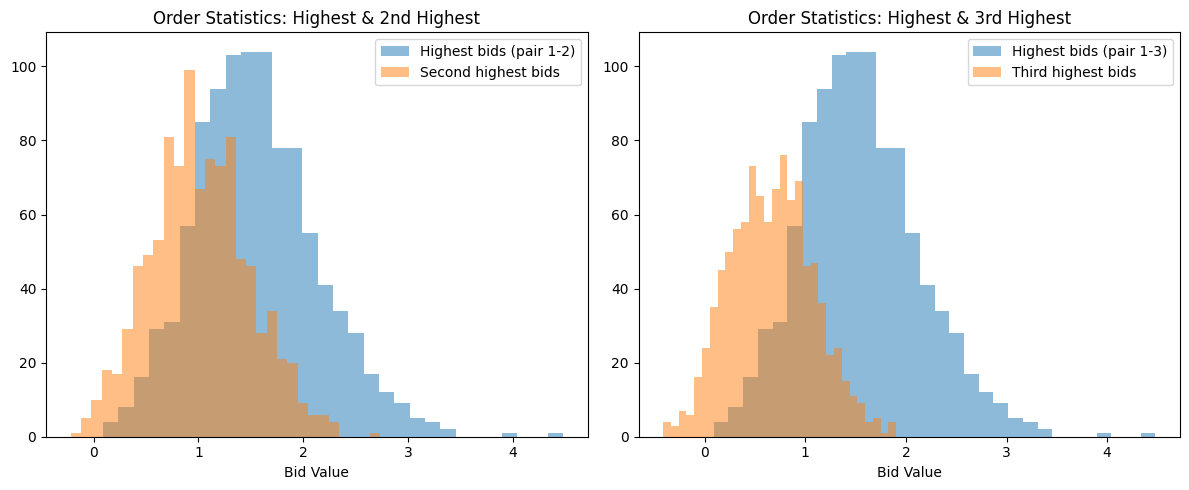

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

# ---------------------------
# 1. Simulate Auction Data
# ---------------------------
def simulate_auctions(num_auctions=1000, num_bidders=10, true_mu=0, true_sigma=1):
    """
    Simulate 'num_auctions' auctions.
    In each auction, 'num_bidders' bids are drawn from N(true_mu, true_sigma).
    Returns a list of arrays with bids sorted in descending order.
    """
    auctions = []
    for i in range(num_auctions):
        bids = np.random.normal(true_mu, true_sigma, num_bidders)
        # sort bids in descending order (highest first)
        bids = np.sort(bids)[::-1]
        auctions.append(bids)
    return auctions

# Generate simulated auctions.
auctions = simulate_auctions(num_auctions=1000, num_bidders=10, true_mu=0, true_sigma=1)

# ---------------------------
# 2. Extract Order Statistic Pairs
# ---------------------------
pairs_12 = []  # (highest, second highest)
pairs_13 = []  # (highest, third highest)

for bids in auctions:
    if len(bids) >= 2:
        pairs_12.append((bids[0], bids[1]))
    if len(bids) >= 3:
        pairs_13.append((bids[0], bids[2]))

pairs_12 = np.array(pairs_12)
pairs_13 = np.array(pairs_13)

# ---------------------------
# 3. Define Log-Likelihood Functions
# ---------------------------
# (i) Using highest and second-highest bids.
def neg_log_lik_12(params, data):
    """
    Negative log-likelihood for the (highest, second highest) pair.
    For each auction with observed (b1, b2):
      L = f(b1; μ, σ) / (1 - F(b2; μ, σ))
    where f and F are the normal pdf and cdf.
    We reparameterize σ = exp(log_sigma) to ensure positivity.
    """
    mu, log_sigma = params
    sigma = np.exp(log_sigma)
    b1 = data[:, 0]  # highest bid
    b2 = data[:, 1]  # second highest bid
    ll = norm.logpdf(b1, loc=mu, scale=sigma) - np.log(1 - norm.cdf(b2, loc=mu, scale=sigma))
    return -np.sum(ll)

# (ii) Using highest and third-highest bids.
def neg_log_lik_13(params, data):
    """
    Negative log-likelihood for the (highest, third highest) pair.
    For each auction with observed (b1, b3):
      L = 2 * (F(b1; μ, σ) - F(b3; μ, σ)) * f(b1; μ, σ) / (1 - F(b3; μ, σ))^2
    Taking logs gives:
      log L = log 2 + log(F(b1)-F(b3)) + log f(b1) - 2 log(1-F(b3))
    """
    mu, log_sigma = params
    sigma = np.exp(log_sigma)
    b1 = data[:, 0]  # highest bid
    b3 = data[:, 1]  # third highest bid
    term = (np.log(2) +
            np.log(norm.cdf(b1, loc=mu, scale=sigma) - norm.cdf(b3, loc=mu, scale=sigma)) +
            norm.logpdf(b1, loc=mu, scale=sigma) -
            2 * np.log(1 - norm.cdf(b3, loc=mu, scale=sigma)))
    return -np.sum(term)

# ---------------------------
# 4. Maximum Likelihood Estimation
# ---------------------------
# We optimize over (mu, log_sigma) so that sigma remains positive.
init_params = [0, np.log(1)]  # initial guess: mu=0, sigma=1

# Estimate using pair (highest, second highest)
res_12 = minimize(neg_log_lik_12, init_params, args=(pairs_12,), method='L-BFGS-B')
mu_12, log_sigma_12 = res_12.x
sigma_12 = np.exp(log_sigma_12)

# Estimate using pair (highest, third highest)
res_13 = minimize(neg_log_lik_13, init_params, args=(pairs_13,), method='L-BFGS-B')
mu_13, log_sigma_13 = res_13.x
sigma_13 = np.exp(log_sigma_13)

# ---------------------------
# 5. Report and Compare Results
# ---------------------------
print("Estimates using (highest, second highest): mu = {:.4f}, sigma = {:.4f}".format(mu_12, sigma_12))
print("Estimates using (highest, third highest): mu = {:.4f}, sigma = {:.4f}".format(mu_13, sigma_13))

# Optional: Plot histograms of the observed pairs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(pairs_12[:, 0], bins=30, alpha=0.5, label='Highest bids (pair 1-2)')
plt.hist(pairs_12[:, 1], bins=30, alpha=0.5, label='Second highest bids')
plt.title('Order Statistics: Highest & 2nd Highest')
plt.xlabel('Bid Value')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(pairs_13[:, 0], bins=30, alpha=0.5, label='Highest bids (pair 1-3)')
plt.hist(pairs_13[:, 1], bins=30, alpha=0.5, label='Third highest bids')
plt.title('Order Statistics: Highest & 3rd Highest')
plt.xlabel('Bid Value')
plt.legend()

plt.tight_layout()
plt.show()
